In [1]:

!pip install easyocr
!pip install imutils
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install Pillow
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2 as cv
import imutils
from google.colab import files
import pytesseract
import easyocr
from easyocr import Reader


reader = easyocr.Reader(['en'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


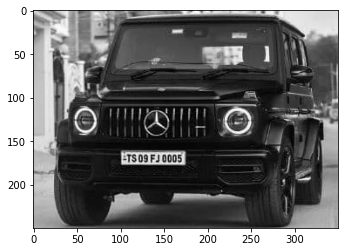

In [2]:

img = cv.imread('carnum.jpg')
grayout = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(grayout,cv.COLOR_BGR2RGB))


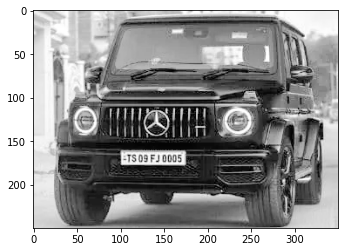

In [3]:
histeq= cv.equalizeHist(grayout)
plt.imshow(cv.cvtColor(histeq,cv.COLOR_BGR2RGB))

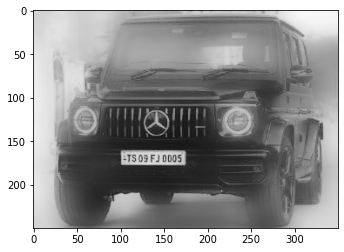

In [4]:
bfilt = cv.bilateralFilter(histeq, 40, 80, 80)
plt.imshow(cv.cvtColor(bfilt,cv.COLOR_BGR2RGB))

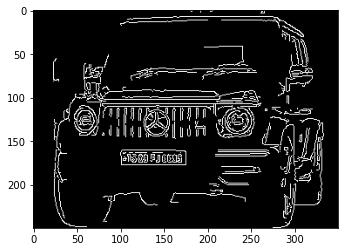

In [18]:
v = np.median(bfilt)
sigma = 0.33
lower_thresh = int(max(0, (1.0 - sigma) * v))
upper_thresh = int(min(255, (1.0 + sigma) * v))

edg = cv.Canny(bfilt,lower_thresh,upper_thresh)
plt.imshow(cv.cvtColor(edg,cv.COLOR_BGR2RGB))

In [6]:
rectfind = cv.findContours(edg, cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
contour= imutils.grab_contours(rectfind)
contour = sorted(contour, key= cv.contourArea,reverse=True) [:10]

In [7]:
targarea = None
for x in contour:
 probar = cv.approxPolyDP(x,10, True)
 if len(probar)== 4:
  targarea = probar 
  break
targarea

array([[[100, 163]],

       [[101, 177]],

       [[175, 177]],

       [[174, 161]]], dtype=int32)

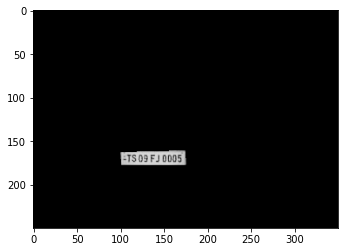

In [14]:
masking = np.zeros(grayout.shape,np.uint8)
res_img = cv.drawContours(masking, [targarea], 0, 255, -1)
res_img = cv.bitwise_and(bfilt, bfilt, mask = masking)
plt.imshow(cv.cvtColor(res_img,cv.COLOR_BGR2RGB))

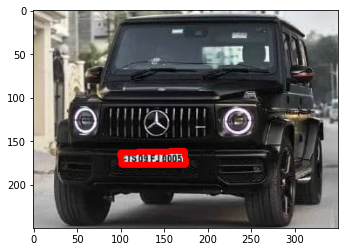

In [15]:
markimg = cv.polylines(img, np.array([targarea]), True, (0,0,255), 1)
plt.imshow(cv.cvtColor(markimg,cv.COLOR_BGR2RGB))

In [16]:
result = reader.readtext(res_img)
result
#EasyOCR result

[([[101, 163], [175, 163], [175, 179], [101, 179]],
  'LIsobeJod05',
  0.007238379334942663)]

In [17]:
pytesseract.pytesseract.tesseract_cmd =   r'/usr/bin/tesseract'
print(pytesseract.image_to_string(res_img))
#TesseractOCR result